In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
style.use('ggplot')

def plot_the_data(fpr, tpr, recall, precision, suptitle):
    fig = plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='classifier')
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('ROC AUC -  %.2f' % roc_auc)

    plt.subplot(1,2,2)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label='classifier')
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.title('PR curve - AUC %.2f' % auc_score)
    plt.suptitle(suptitle, fontsize=20)

def compute_classif_metrics(X, y, model):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, 
                                                        stratify=y, random_state=0)    
    model.fit(train_X, train_y)

    pred_y = model.predict_proba(test_X)
    pos_probs = pred_y[:, 1]

    precision, recall, _ = precision_recall_curve(test_y, pos_probs)
    fpr, tpr, _ = roc_curve(test_y, pos_probs)
    
    return fpr, tpr, recall, precision, pos_probs

# Balanced dataset

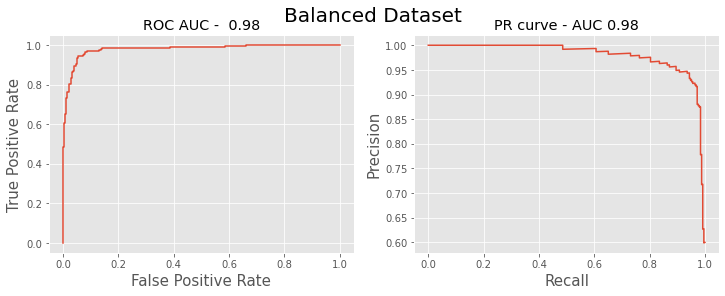

In [3]:
# generate the data
X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           random_state=0)
model = LogisticRegression()
fpr, tpr, recall, precision, pos_probs = compute_classif_metrics(X, y, model)

plot_the_data(fpr, tpr, recall, precision, 'Balanced Dataset')


# Imbalanced dataset

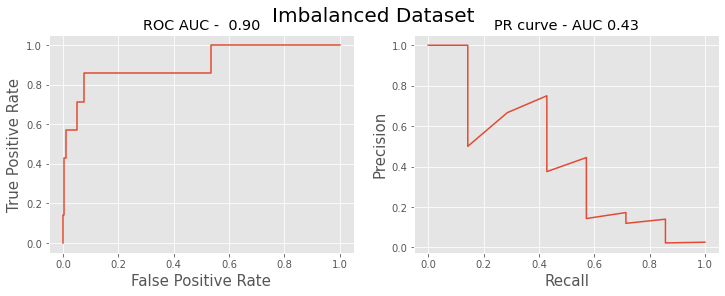

In [4]:
# generate the data
X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           weights=[0.99, 0.01], 
                           random_state=0)
model = LogisticRegression()
fpr, tpr, recall, precision, pos_probs = compute_classif_metrics(X, y, model)

plot_the_data(fpr, tpr, recall, precision, 'Imbalanced Dataset')